In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("kc_house_data (1).csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['date'].values

array(['20141013T000000', '20141209T000000', '20150225T000000', ...,
       '20140623T000000', '20150116T000000', '20141015T000000'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['date']=encoder.fit_transform(df['date'])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,164,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,220,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,290,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,220,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,283,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


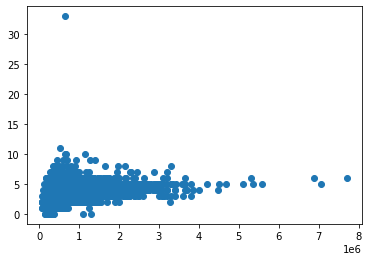

In [8]:
#visualize the data using scatter plot
plt.scatter(df['price'],df['bedrooms'])

In [9]:
#the most important features are: price,date,bedrooms


<AxesSubplot:>

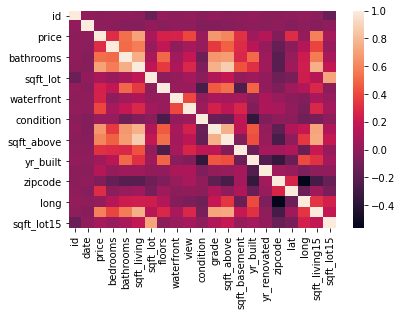

In [10]:
#the correlation matrix
sns.heatmap(df.corr())

In [29]:
#split the data into training set and test set
from sklearn.model_selection import train_test_split
x=df[['bedrooms']]
y=df['price'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [30]:
#train the data on a LinearRegression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
#Predicting the Test set results
from sklearn import metrics
from sklearn.metrics import mean_squared_error
predicted=model.predict(x_test)
print(predicted)

[616810.16148794 492307.71518678 492307.71518678 ... 616810.16148794
 741312.60778911 492307.71518678]


In [32]:
# Calculating the coefficients
print(model.coef_)


[124502.44630116]


In [33]:
# Calculating the Intercept
print(model.intercept_)

118800.37628328701


In [34]:
print("MSE",mean_squared_error(y_test,predicted))
print("R_Squared",metrics.r2_score(y_test,predicted))

MSE 132573544952.57489
R_Squared 0.08450729633966514


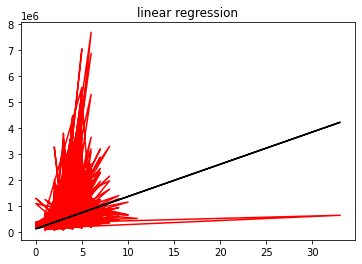

In [35]:
plt.plot(x,y,color="red")
plt.title("linear regression")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [44]:
#using multi_linear_regression
x=df[['price','bedrooms','date']]
y=df[['price']].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)
model1=LinearRegression()
model1.fit(x_train,y_train)
predicted1=model1.predict(x_test)
print("predicted1",predicted1)
print("MSE",mean_squared_error(y_test,predicted1))
print("R_Squared",metrics.r2_score(y_test,predicted1))

predicted1 [[353500.]
 [384950.]
 [340000.]
 ...
 [760000.]
 [605000.]
 [585000.]]
MSE 8.247108957817243e-21
R_Squared 1.0


In [46]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

x=df[['price','bedrooms','date']]
y=df[['price']].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

model=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit=poly.fit_transform(x_train)
model.fit(x_train_fit,y_train)
x_test_=poly.fit_transform(x_test)

predicted=model.predict(x_test_)

print(predicted)
print("MSE",mean_squared_error(y_test,predicted))
print("R_Squared",metrics.r2_score(y_test,predicted))


[[353500.00002556]
 [384950.00001696]
 [340000.00002951]
 ...
 [759999.99995159]
 [604999.99999451]
 [584999.99997341]]
MSE 1.200554594554672e-08
R_Squared 1.0
